## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')
from pathlib import Path
import os


sns.set()

## DB Locations

In [2]:
work_dir=Path(os.getcwd()).parent.parent
data_dir = work_dir.joinpath('data')
covid_db = data_dir.joinpath('covid.db')
tweets_db = data_dir.joinpath('tweet.db')


## SqlAlchemy Connection

In [3]:
from sqlalchemy import create_engine

tweet_engine = create_engine(f'sqlite:///{tweets_db}')
covid_engine = create_engine(f'sqlite:///{covid_db}')


## Read DB into DF

In [4]:
tweet_df = pd.read_sql_table('tweet', tweet_engine)
covid_df = pd.read_sql_table('covid', covid_engine)

### Show Samples

In [5]:
tweet_df.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed was a hoax. We al...,['COVID19'],Twitter for Android,False
1,3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,The one gift has give me is an appreciation ...,['COVID19'],Twitter for iPhone,False
2,4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel \n,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
3,5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue to rise. It's almost as bad...,"['coronavirus', 'covid19']",Twitter Web App,False
4,6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How Will Change Work in General (and recruiti...,"['COVID19', 'Recruiting']",Buffer,False


In [6]:
covid_df.head()

,index,iso_code,continent,location,date,total_cases,new_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations,total_tests,new_tests,hosp_patients
0,204,AFG,Asia,Afghanistan,2020-07-25,35981.0,66.0,14.0,1225.0,NaN,NaN,NaN,NaN,NaN
1,205,AFG,Asia,Afghanistan,2020-07-26,36036.0,55.0,21.0,1246.0,NaN,NaN,NaN,NaN,NaN
2,206,AFG,Asia,Afghanistan,2020-07-27,36157.0,121.0,13.0,1259.0,NaN,NaN,NaN,NaN,NaN
3,207,AFG,Asia,Afghanistan,2020-07-28,36263.0,106.0,10.0,1269.0,NaN,NaN,NaN,NaN,NaN
4,208,AFG,Asia,Afghanistan,2020-07-29,36368.0,105.0,1.0,1270.0,NaN,NaN,NaN,NaN,NaN


## EDA on Tweet Data

### Trend of Tweets per Date

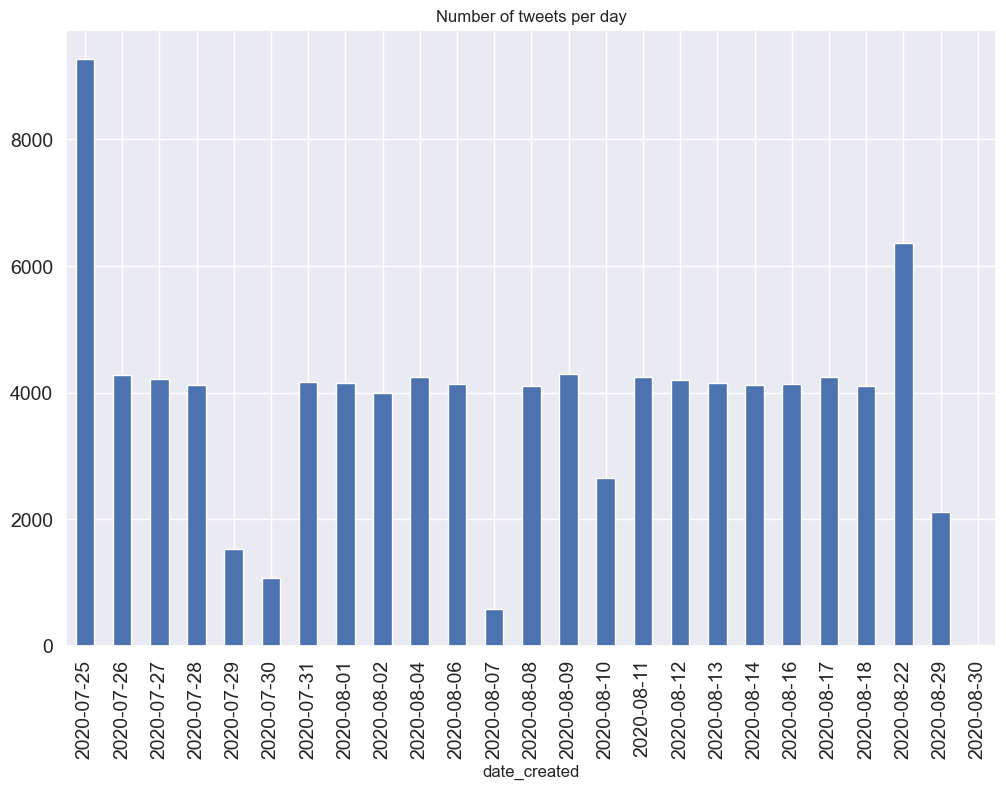

In [10]:
# Line plot: number of tweets per day
tweet_df['date'] = pd.to_datetime(tweet_df['date'])
tweet_df['date_created'] = tweet_df['date'].dt.date
tweet_df.groupby('date_created')['text'].count().plot(kind='bar', figsize=(12,8), title='Number of tweets per day', fontsize=14)
plt.show()

### Tweets Per Hour

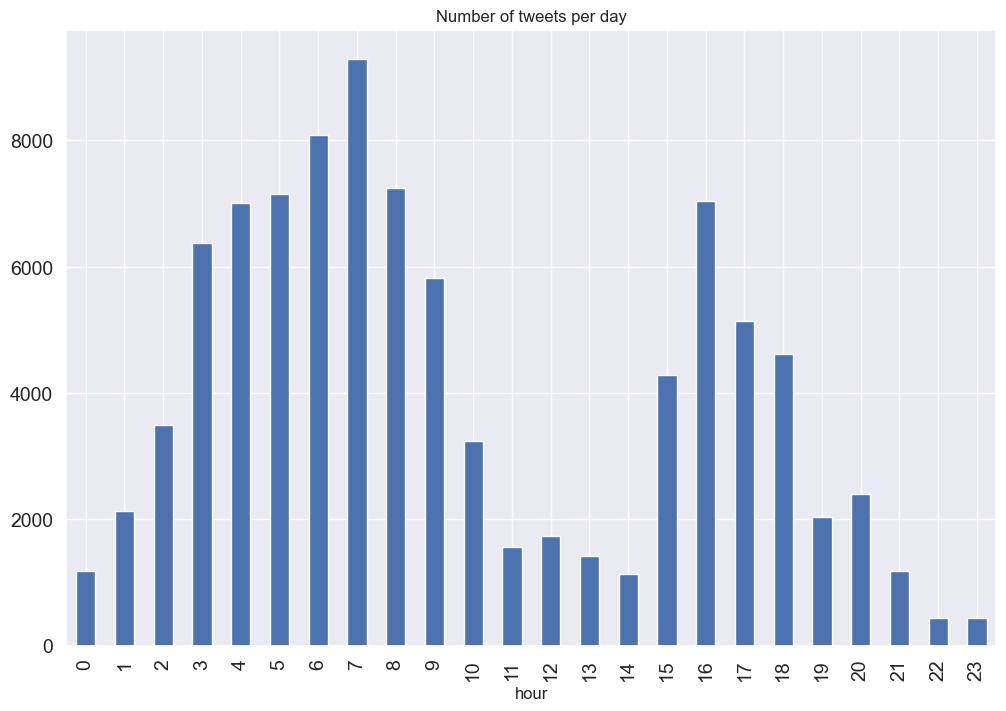

In [11]:
# Line plot: number of tweets per hour
tweet_df['hour'] = tweet_df['date'].dt.hour
tweet_df.groupby('hour')['text'].count().plot(kind='bar', figsize=(12,8), title='Number of tweets per day', fontsize=14)
plt.show()

### Tweets Per Day

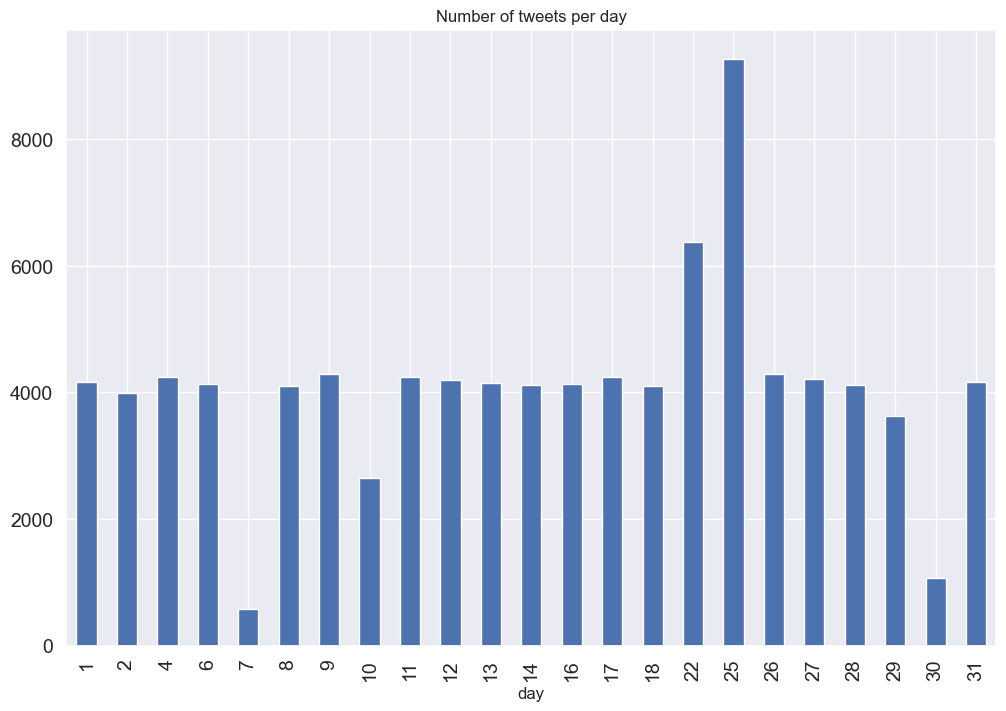

In [12]:
# Line plot: number of tweets per hour
tweet_df['day'] = tweet_df['date'].dt.day
tweet_df.groupby('day')['text'].count().plot(kind='bar', figsize=(12,8), title='Number of tweets per day', fontsize=14)
plt.show()

### Tweet Per Week Day

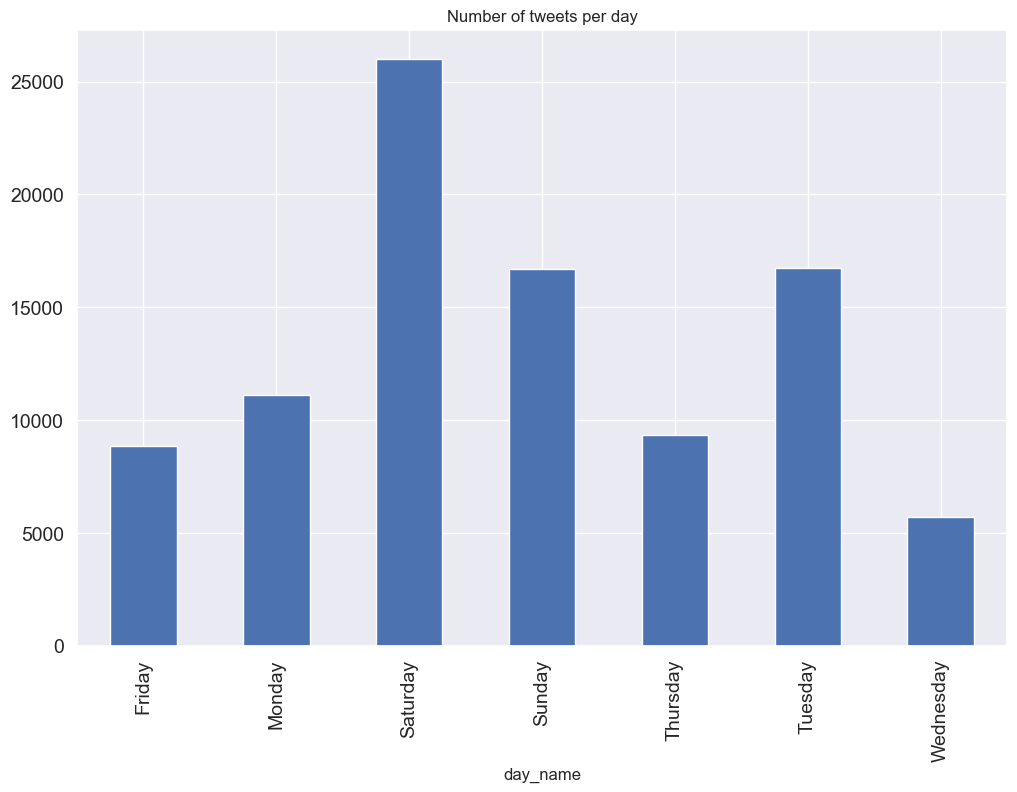

In [15]:
# Line plot: number of tweets per hour
tweet_df['day_name'] = tweet_df['date'].dt.day_name()
tweet_df.groupby('day_name')['text'].count().plot(kind='bar', figsize=(12,8), title='Number of tweets per day', fontsize=14)
plt.show()

### Tweets Per Device

In [22]:
top_5_src = tweet_df.source.value_counts().index[:5]
tweet_df['source'] = tweet_df['source'].apply(lambda x: x if x in top_5_src else 'other')

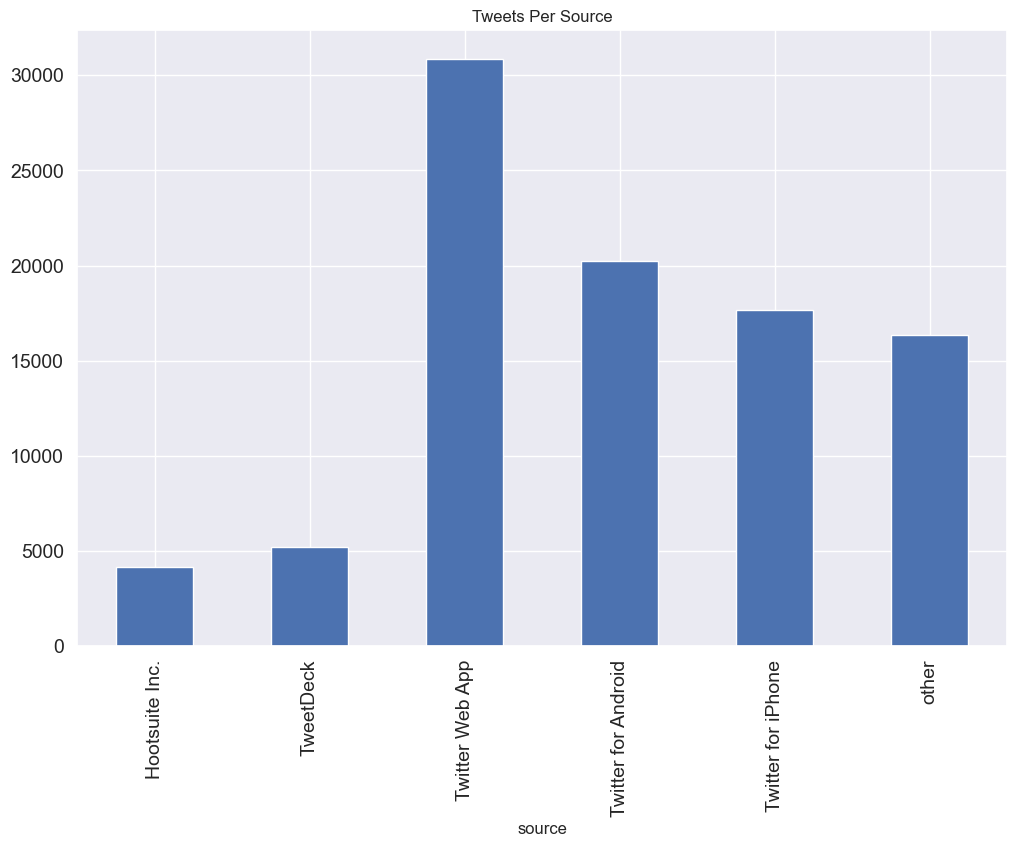

In [24]:
tweet_df.groupby('source')['text'].count().plot(kind='bar', figsize=(12,8), title='Tweets Per Source', fontsize=14)
plt.show()

### Tweet WordCloud

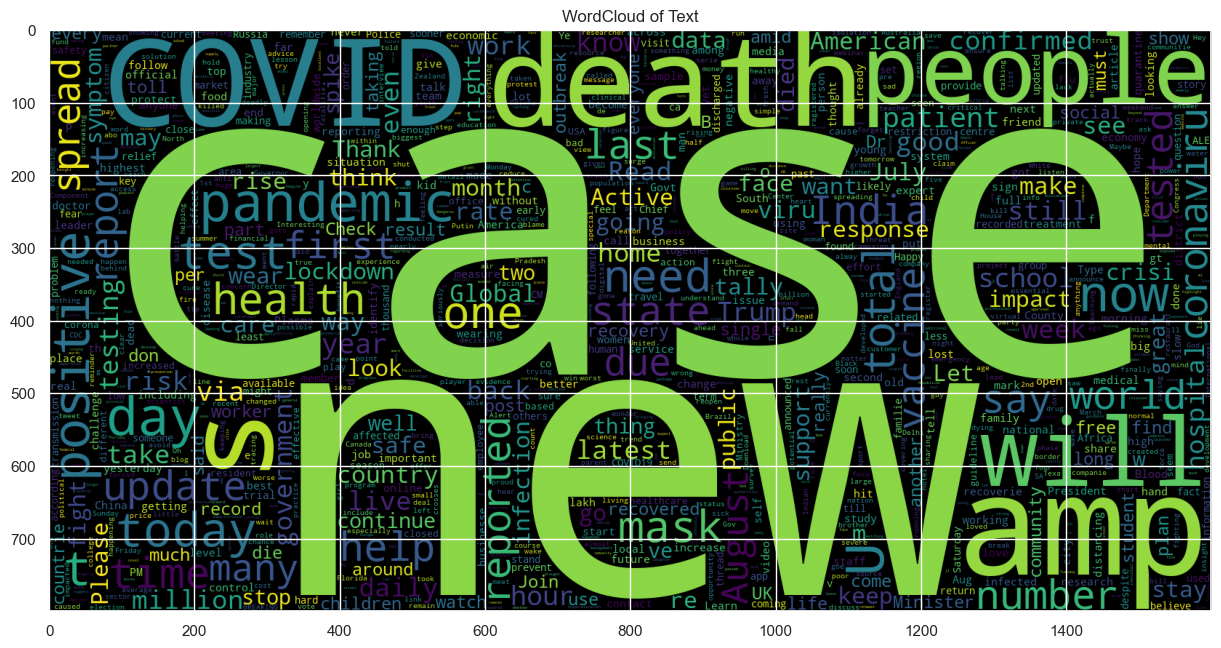

In [37]:
from wordcloud import WordCloud

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
                            collocations=False).generate(" ".join(tweet_df[tweet_df.text.isna()==False].text))

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.title('WordCloud of Text')
plt.show()

### WordCloud Bio

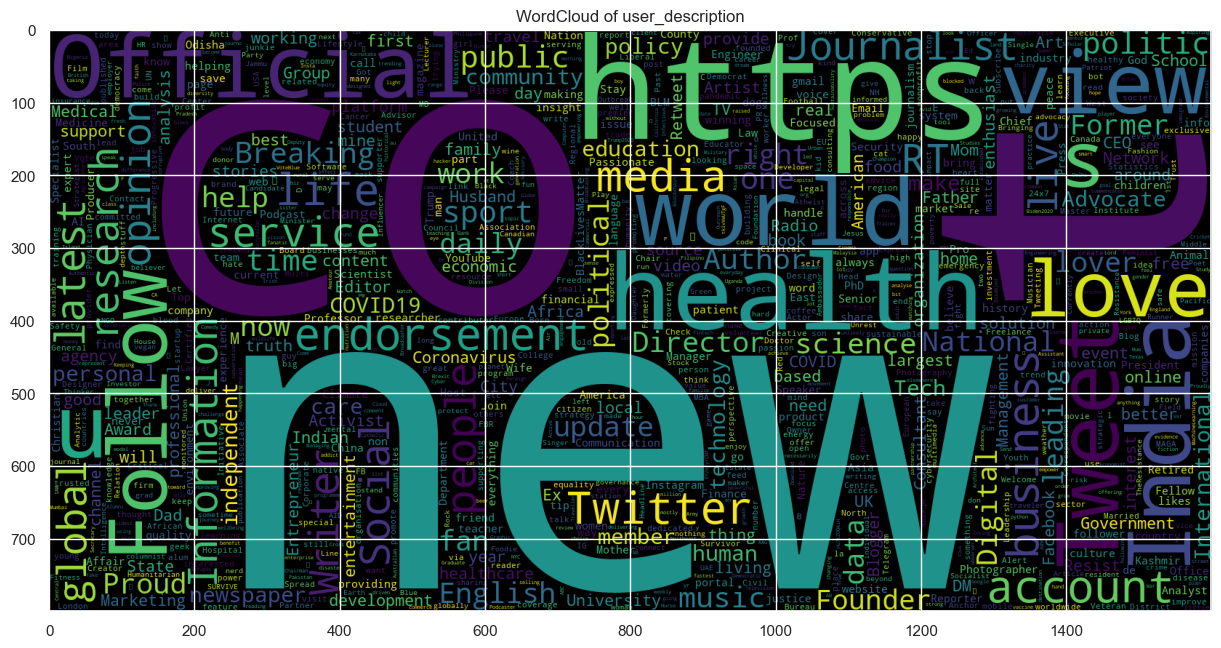

In [38]:
from wordcloud import WordCloud

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
                            collocations=False).generate(" ".join(tweet_df[tweet_df.user_description.isna()==False].user_description))

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.title('WordCloud of user_description')
plt.show()

## EDA on COVID Data

### Trend of New Cases Per Day

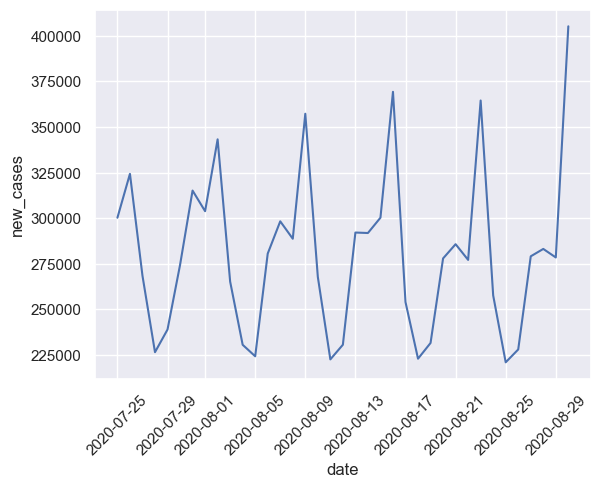

In [63]:
todf = covid_df[~covid_df.location.isin(["Lower middle income", "North America", "World", "Asia", "Europe", 
                           "European Union", "Upper middle income", 
                           "High income", "South America"])]
cworld_df = todf.groupby("date").aggregate(new_cases=("new_cases", "sum"),
                                   new_deaths = ("new_deaths", "sum"),
                                   new_vaccinations = ("new_vaccinations", "sum"),
                                   new_tests = ("new_tests", "sum")
                                   ).reset_index()

cworld_df['date'] = pd.to_datetime(cworld_df['date'])

sns.lineplot(x=cworld_df['date'], y=cworld_df['new_cases'])
plt.xticks(rotation=45)
plt.show()

### Trend of New Deaths Per Day

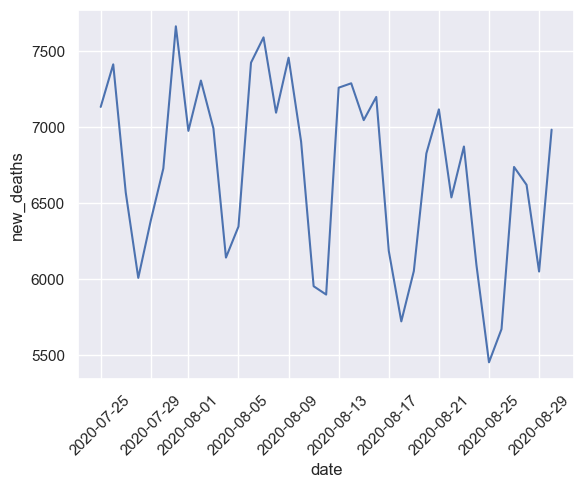

In [64]:

cworld_df['date'] = pd.to_datetime(cworld_df['date'])

sns.lineplot(x=cworld_df['date'], y=cworld_df['new_deaths'])
plt.xticks(rotation=45)
plt.show()

## Compare Trends

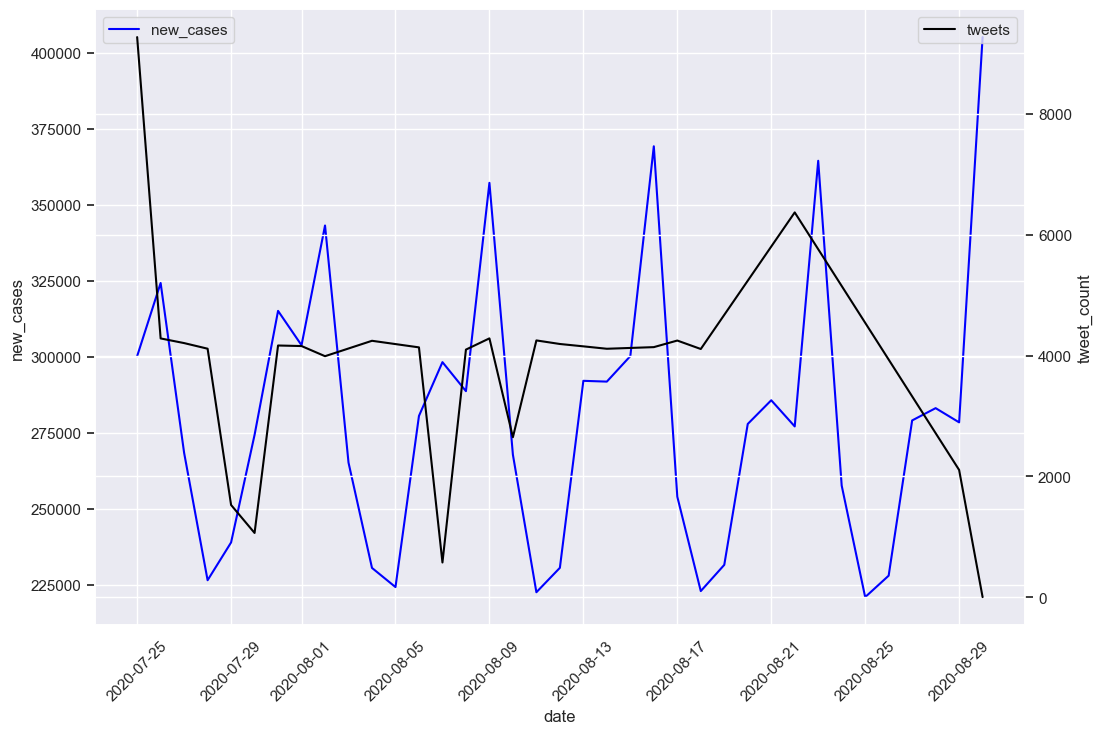

In [65]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_cases'], label='new_cases', color='blue')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=tdf['date_created'], y=tdf['tweet_count'], label='tweets', color='black', ax=ax.axes.twinx())
plt.show()

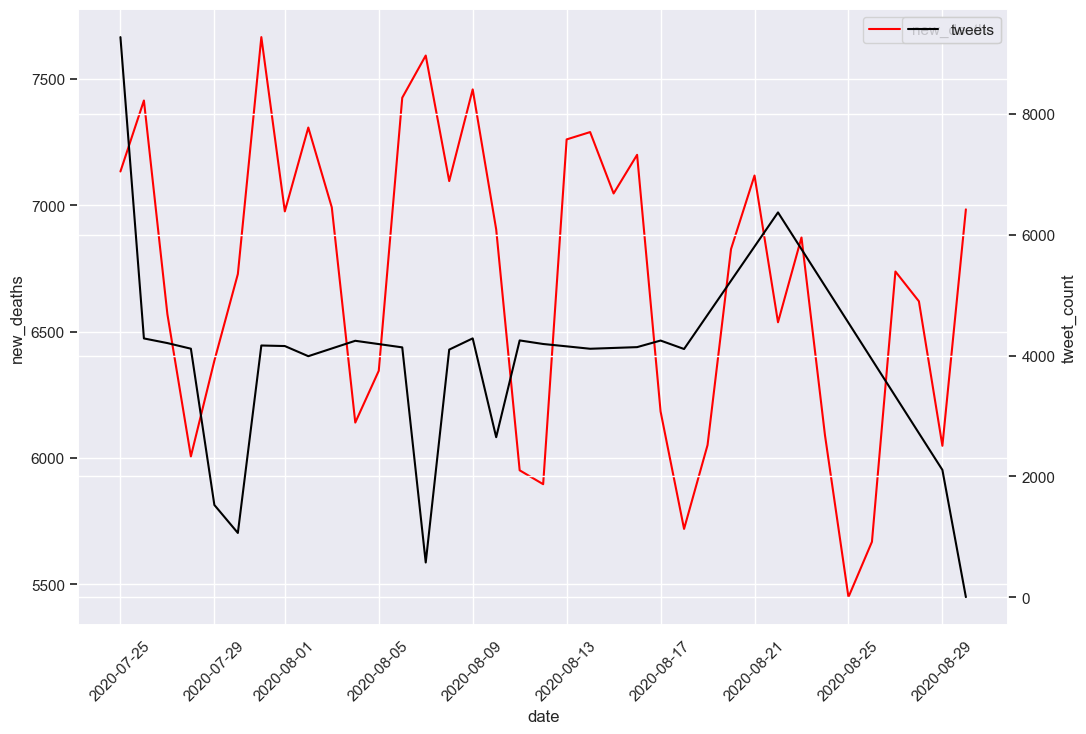

In [66]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_deaths'], label='new_deaths', color='red')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=tdf['date_created'], y=tdf['tweet_count'], label='tweets', color='black', ax=ax.axes.twinx())
plt.show()

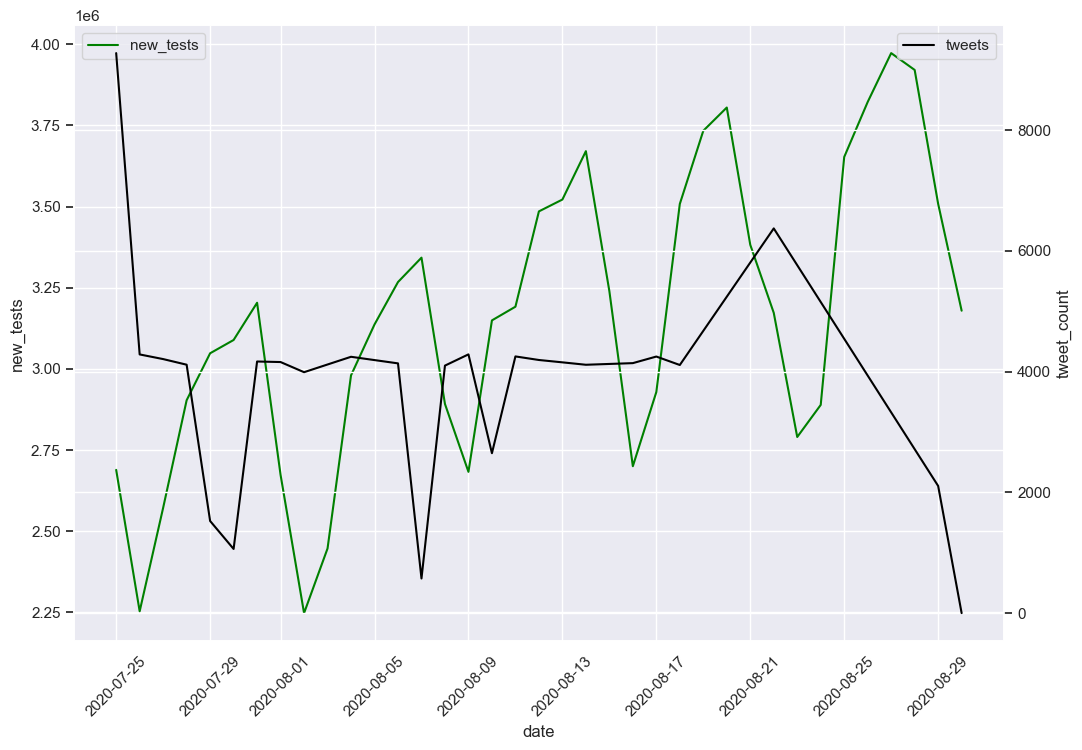

In [67]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_tests'], label='new_tests', color='green')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=tdf['date_created'], y=tdf['tweet_count'], label='tweets', color='black', ax=ax.axes.twinx())
plt.show()

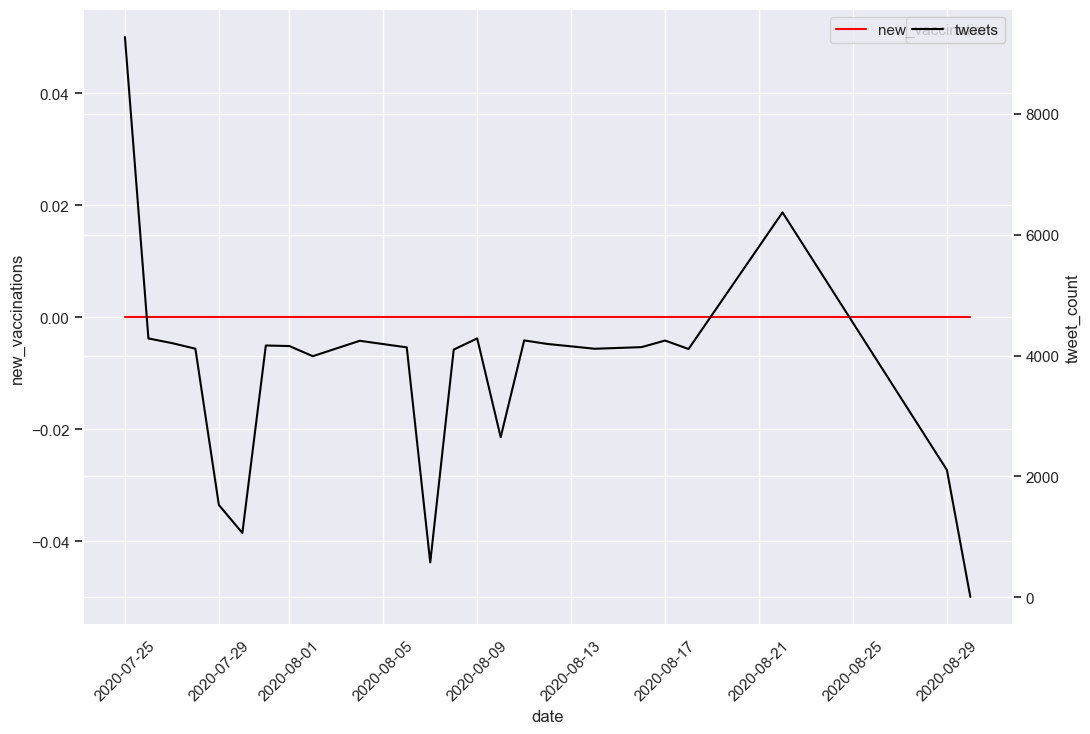

In [68]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_vaccinations'], label='new_vaccinations', color='red')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=tdf['date_created'], y=tdf['tweet_count'], label='tweets', color='black', ax=ax.axes.twinx())
plt.show()

In [69]:
cworld_df['new_vaccinations']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
Name: new_vaccinations, dtype: float64